In [5]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [41]:
source = "gradeview.io"

In [2]:
grades = [1.0, 
        1.3,
        1.7,
        2.0,
        2.3,
        2.7,
        3.0,
        3.3,
        3.7,
        4.0
]

values = np.array([
    29.98626,
    66.16995,
    74.49048,
    74.24784,
    91.15176,
    67.35282,
    47.83041,
    26.1849,
    8.7957,
    4.28664
], dtype=np.int32)

In [4]:
values

array([29, 66, 74, 74, 91, 67, 47, 26,  8,  4], dtype=int32)

In [6]:
all_data = [grade for i, grade in enumerate(grades) for val in range(values[i])]

In [7]:
np.unique(all_data, return_counts=True)

(array([1. , 1.3, 1.7, 2. , 2.3, 2.7, 3. , 3.3, 3.7, 4. ]),
 array([29, 66, 74, 74, 91, 67, 47, 26,  8,  4]))

In [38]:
x_axis = np.linspace(1.0, 4.0, 45)
x_axis

array([1.        , 1.06818182, 1.13636364, 1.20454545, 1.27272727,
       1.34090909, 1.40909091, 1.47727273, 1.54545455, 1.61363636,
       1.68181818, 1.75      , 1.81818182, 1.88636364, 1.95454545,
       2.02272727, 2.09090909, 2.15909091, 2.22727273, 2.29545455,
       2.36363636, 2.43181818, 2.5       , 2.56818182, 2.63636364,
       2.70454545, 2.77272727, 2.84090909, 2.90909091, 2.97727273,
       3.04545455, 3.11363636, 3.18181818, 3.25      , 3.31818182,
       3.38636364, 3.45454545, 3.52272727, 3.59090909, 3.65909091,
       3.72727273, 3.79545455, 3.86363636, 3.93181818, 4.        ])

In [52]:
kde = KernelDensity(bandwidth=0.2, kernel='gaussian')
kde.fit(np.array(all_data).reshape(-1, 1))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

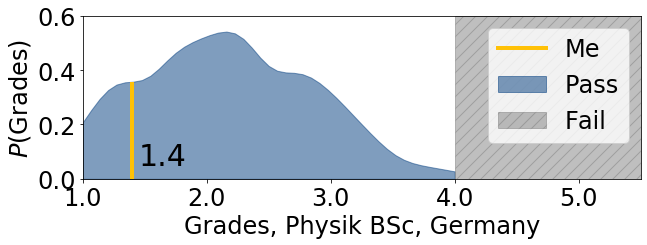

In [70]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.rcParams.update({'font.size': 24})
logprob = kde.score_samples(np.array(x_axis).reshape(-1, 1))
density = np.exp(logprob)
ax.fill_between(x_axis, density, alpha=0.5, label='Pass', color='#003C7E')
fail_axis = np.array([4.0, 5.5])
fail_area = np.array([0.6, 0.6])
ax.fill_between(fail_axis, fail_area, alpha=0.5, color='grey', hatch='//', label='Fail')
ax.set_xlabel('Grades, Physik BSc, Germany')
ax.set_ylabel(r"$P($Grades$)$")
y_scaling = 0.6
ax.axvline(x=1.4, ymin=0.0, ymax=density[6] / y_scaling * 0.98, c='#FFC107', label="Me", linewidth=4)
ax.text(1.45, 0.05, "1.4", fontsize=30)
xt = ax.get_xticks()
yt = ax.get_yticks()

xt1 = xt.tolist()
ax.set_xticks(xt)
ax.set_xticklabels(xt1)
ax.set_xlim(1.0, 5.5)
ax.set_ylim(0.0, y_scaling)
ax.legend(loc='upper right')
